In [1]:
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

# Units

In [2]:
BOLTZMANN = 1.380649e-23 
AVOGADRO = 6.02214076e23
KILO = 1e3
RGAS = BOLTZMANN*AVOGADRO
BOLTZ = (RGAS/KILO)  

# System Configuration

In [6]:
d = 1
n = 10
Reduced_Temp = 1
Multiplier = 119.8
T = Reduced_Temp * Multiplier
m = np.ones((n, 1))


# General Functions for MD simulations

## Velocity Initialization

In [7]:
def generate_velocities(number_particles, system_dimension, masses, temperature):
    h = []
    dof = number_particles * system_dimension
    while(len(h) < dof):
        r2 = 0
        while r2 >= 1 or r2 == 0:
            x = 2 * random.uniform(0, 1) - 1
            y = 2 * random.uniform(0, 1) - 1
            r2 = x**2 + y**2
        mult = math.sqrt(- 2 * math.log(r2) / r2)
        h.extend([x*mult, y*mult])
    vels = np.array(h[:dof]).reshape(-1, 1).astype('float32')
    scaledvels = vels * np.sqrt(BOLTZ * temperature / masses)
    return scaledvels

In [8]:
returned_vels = generate_velocities(n, d, m, T)

## Integrator

In [9]:
def velocity_verlet_step(x, v, m, dt):
    F = np.array(list(map(force, x.flatten()))).reshape(x.shape)
    v = v + (dt / 2) * (F / m)
    x = x + (dt) * v
    F = np.array(list(map(force, x.flatten()))).reshape(x.shape)
    v = v + (dt / 2) * (F / m)
    return x, v

##  Potential energy and Force function

In [10]:
def pot_energy(x):
    rv = 20
    if x >= -2 and x <= -1.25:
        rv = 1 + np.sin(2 * np.pi * x)
    
    if x >= -1.25 and x <= -0.25:
        rv = 2 * (1 + np.sin(2 * np.pi * x))
        
    if x >= -0.25 and x <= 0.75:
        rv = 3 * (1 + np.sin(2 * np.pi * x))
                  
    if x >= 0.75 and x <= 1.75:
        rv = 4 * (1 + np.sin(2 * np.pi * x))
                  
    if x >= 1.75 and x <= 2:
        rv = 5 * (1 + np.sin(2 * np.pi * x))
                  
    return rv

In [11]:
def force(x):
    lorge = 60
    if x < -2:
        return lorge
    if x > 2:
        return -1 * lorge
    rv = 0
    if x >= -2 and x <= -1.25:
        rv = -2 * np.pi * np.cos(2 * np.pi * x)
    
    if x >= -1.25 and x <= -0.25:
        rv = -4 * np.pi * np.cos(2 * np.pi * x)
        
    if x >= -0.25 and x <= 0.75:
        rv = -6 * np.pi * np.cos(2 * np.pi * x)
                  
    if x >= 0.75 and x <= 1.75:
        rv = -8 * np.pi * np.cos(2 * np.pi * x)
        
    if x >= 1.75 and x <= 2:
        rv = -10 * np.pi * np.cos(2 * np.pi * x)
                  
    return rv

In [12]:
tmp_x = np.linspace(-5, 5, 1000)
U = np.array(list(map(pot_energy, tmp_x)))
f = np.array(list(map(force, tmp_x)))

[2.0, 4.0, 6.0, 8.0]


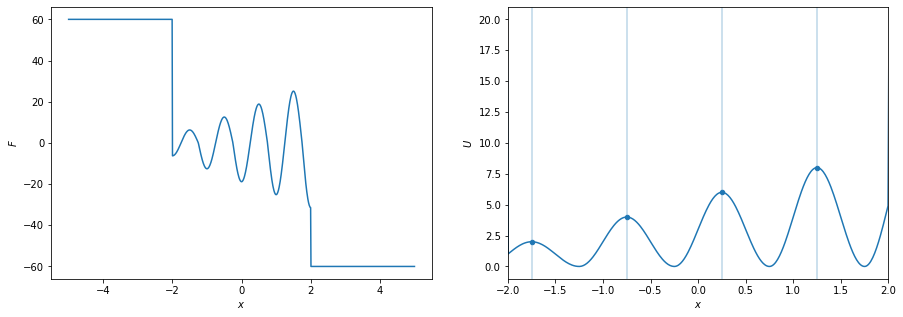

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].plot(tmp_x, f)
axes[0].set_xlabel(r'$x$')
_ = axes[0].set_ylabel(r'$F$')

axes[1].plot(tmp_x, U)
axes[1].set_xlabel(r'$x$')
axes[1].set_xlim([-2, 2])
_ = axes[1].set_ylabel(r'$U$')
maximas = [-1.75, -0.75, 0.25, 1.25]
pot = list(map(pot_energy, maximas))
_ = axes[1].scatter(maximas, pot, s = 20)

for i in maximas:
    _ = axes[1].axvline(x = i, alpha = 0.3)

print(pot)

## Helper Functions

In [14]:
def write_to_file(x, v, step):
    p = ' '.join([str(i) for i in x.flatten()])
    pos_file.write(p)
    pos_file.write("\n")
    
    p = ' '.join([str(i) for i in v.flatten()])
    vel_file.write(p)
    vel_file.write("\n")
    

    
def step(num_steps, x, v, m, dt):
    global vel_file, pos_file
    vel_file = open("velocities.txt", "w")
    pos_file = open("positions.txt", "w")
    for i in range(num_steps):
        x_new, v_new = velocity_verlet_step(x, v, m, dt)
        write_to_file(x, v, i)
        x, v = x_new, v_new
    pos_file.close()
    vel_file.close()

### Simulation at $T_A$ = 0.30

In [15]:
config = {
    'num_particles' : 1,
    'temperature' : 0.30,
}

In [16]:
reduced_temperature = config['temperature']
n = config['num_particles']
print("Number of particles = ", n)
print("Temperature = ", reduced_temperature)

Number of particles =  1
Temperature =  0.3


In [17]:
T = reduced_temperature * Multiplier
vel_a = generate_velocities(n, d, m, T)

In [18]:
x = np.random.normal(-1.6, 0.9, size = (n, d))

In [19]:
print(x.shape, vel_a.shape)

(1, 1) (10, 1)


In [20]:
step(int(1e2), x, vel_a, m, 1e-3)

### Analysis of simulation at $T_A$ = 0.30

In [36]:
def read_from_file(pos_file, vel_file):
    x_f = open(pos_file, "r")
    v_f = open(vel_file, "r")    
    pos, vel = [], []
    
    lines = x_f.readlines()
    for line in lines:
        l = line.split(' ')
        print(float(l[0]))
        pos.append([float(i) for i in l])
        print(pos)
    pos = np.array(pos)
    print(pos)
    
    lines = v_f.readlines()
    for line in lines:
        l = line.split(' ')
        vel.append([float(i) for i in l])
    vel = np.array(vel)
    
    return pos, vel

In [37]:
pos, vel = read_from_file("positions.txt", "velocities.txt")

-2.8273340595934373
[[-2.8273340595934373]]
-2.8277844864087136
[[-2.8273340595934373], [-2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136]]
-2.82817491322399
[[-2.8273340595934373], [-2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136], [-2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399]]
-2.8285053400392663
[[-2.8273340595934373], [-2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136]

/home/shaunak/miniconda2/envs/MD/lib/python3.6/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [23]:
np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

(array([0, 2, 1]), array([0, 1, 2, 3]))

In [25]:
print(pos)

[list([-2.8273340595934373])
 list([-2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136, -2.8277844864087136])
 list([-2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399, -2.82817491322399])
 list([-2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663, -2.8285053400392663])
 list([-2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543, -2.828775766854543])
 list([-2.8289861936698193, -2.8289861936698193, -2.8289861936698193, -2.8289861936698193, -2.8289861936698193, -2.82898619366981

In [24]:
counts, bounds = np.histogram(pos.flatten(), bins=np.arange(-2, 2, 0.125))

TypeError: '<' not supported between instances of 'list' and 'float'

In [ ]:
print(bounds)

In [ ]:
centers = []
for i in range(len(bounds) - 1):
    centers.append((bounds[i] + bounds[i + 1]) / 2)
print(centers)

In [ ]:
plt.plot(centers, counts)

## Integrator : Simulating NVE dynamics for the PE function for 1 particle

In [ ]:
def step(x, v, dt = 0.001, m = 1):
    f = force(x)
    x_new = x + dt * v + dt * dt * f / (2 * m)
    f_new = force(x_new)
    v_new = v + dt * (f + f_new) / (2 * m)
    return x_new, v_new

In [ ]:
x = 1.0
v = 0.01
no_of_steps = 10000

In [ ]:
pos = []
vel = []
pos.append(x)
vel.append(v)

In [ ]:
for t in range(no_of_steps):
    x_new, v_new = step(x, v)
    x, v = x_new, v_new
    pos.append(x)
    vel.append(v_new)

In [ ]:
x_axis = np.linspace(-5, 5, 1000)
plt.plot(x_axis, U)
U_all = np.array(list(map(pot_energy, pos)))
plt.plot(pos, U_all, color='red')

## Coorelating Temperature into the system : Andersen Thermostat

### Initialization of system

In [ ]:
T = 2.0

In [ ]:
n_p = 108
dt = 1e-4

In [ ]:
x_range = np.linspace(-1.7, 1.7, 1000)
req_shape = (n_p, 1)
x = np.random.choice(x_range, req_shape)
v = np.random.random(req_shape) - 0.5

In [ ]:
m = np.ones(req_shape)
v_com = np.sum(m * v, axis = 0) / np.sum(m)

In [ ]:
KE = np.sum(m * v**2) / 2

In [ ]:
scaling_factor = np.sqrt(3 * T / (KE * n_p))
v = (v - v_com) * scaling_factor

In [ ]:
force_t = np.array(list(map(force, x)))

In [ ]:
def integrate(switch, x, v, f, temp, nu = 0.01):
    if switch == 1:
        x_new = x + dt * v + (f / m) * dt *  dt / 2
        v_new = v + dt * (f / (2 * m))
    elif switch == 2:
        v_new = v + dt * (f / (2 * m))
        KE = m * (v_new ** 2)
        sigma = np.sqrt(temp)
        probs = np.random.random(size = (n_p, 1))
        g = np.random.normal(0, sigma, n_p).reshape(-1, 1)
        ind = probs < nu * dt
        if ind.any():
            print("Gaussian velocity replaced")
        v_new = (probs > nu * dt) * v  + (probs < nu * dt) * g
        x_new = x
    return x_new, v_new
        

In [ ]:
x_new, v_new = integrate(1, x, v, force_t, T)
f_new = np.array(list(map(force, x_new)))
x_new, v_new = integrate(2, x_new, v_new, f_new, T)

In [ ]:
U = np.array(list(map(pot_energy, x_range)))
plt.plot(x_range, U)
U_x = np.array(list(map(pot_energy, x)))
plt.scatter(x, U_x, color = 'red')
plt.title("Initial starting positions")

### Running a simulation of Andersen Thermostat for nsteps = 10000

In [ ]:
nstep = 10000
outFreq = 100

In [ ]:
vels = v

In [ ]:
for step in range(1, nstep + 1):
    x_n, v_n = integrate(1, x, v, force_t, T)
    f_n = np.array(list(map(force, x_new)))
    x_n, v_n = integrate(2, x_n, v_n, f_n, T)
#     print(np.linalg.norm(x_n - x))
    if step % outFreq:
        vels = np.hstack((vels, v))
    x, v = x_n, v_n


In [ ]:
def hist(vels):
    h = np.around(vels, 2)
    vel_vals, vel_count = np.unique(h, return_counts = True)
    return vel_vals, (vel_count / vel_count.sum())

In [ ]:
b_x, b_y = hist(vels)

In [ ]:
plt.plot(b_x, b_y)

In [ ]:
plt.plot(x)